In [2]:
# Revenue distribution analysis
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import matplotlib.pyplot as plt

sys.path.append("../")
from adamodaran_utils import get_adamodar_file


In [14]:
# Create a revenue time series from DollarUS data
# TODO: We are forgetting to fetch the latest years data in this file and other time series analsys files
years = np.array(range(2019,2025))  # Don't for industry revenues before 2019 doesn't exist
dollar = dict.fromkeys(years)
for year in years:
    if (year != years[-1]):
        df = get_adamodar_file(filename="DollarUS", year=year-2000)
    else:
        df = get_adamodar_file(filename="DollarUS")
    dollar[year] = df

revenue_temp = pd.DataFrame()
for year in years:
    revenue_temp[year] = dollar[year][dollar[year].filter(regex=".*Revenue.*",axis=1).columns[0]] # Between data of different years, the column name is changing 

# revenue_ts = revenue_temp.T
# revenue_ts.index = pd.to_datetime(revenue_ts.index, format="%Y")+pd.offsets.YearEnd(0)
print(revenue_temp.head())
print(years.shape[0])


                         2019        2020        2021        2022        2023  \
Industry  Name                                                                  
Advertising         30171.866   31929.256   35236.063   41079.513   42281.556   
Aerospace/Defense  417640.786  386417.611  355621.130  358222.888  387474.417   
Air Transport      187459.404  103261.180  103563.730  191721.510  229031.320   
Apparel             76827.281   58827.968   68193.812   72102.336   71608.834   
Auto & Truck       342991.848  290390.126  335192.330  401168.212  466503.368   

                         2024  
Industry  Name                 
Advertising         42768.949  
Aerospace/Defense  494053.030  
Air Transport      235530.200  
Apparel             67822.858  
Auto & Truck       486262.586  
6


C:\Users\sarav\AppData\Local\Temp\ipykernel_23820\1755649346.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Year')


<Figure size 1000x600 with 0 Axes>

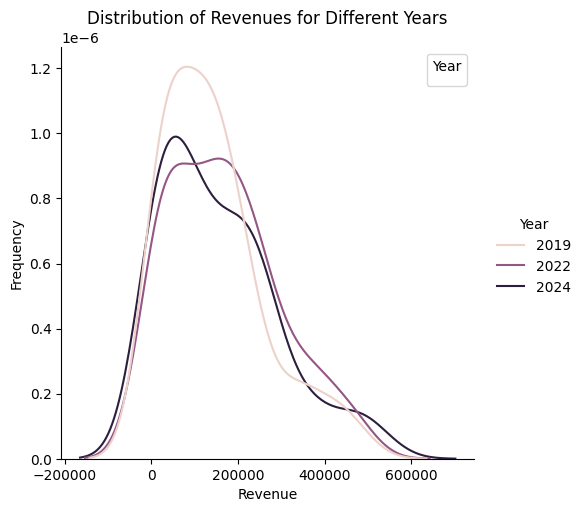

In [18]:
revenue_df = revenue_temp[[years[0], years[int(years.shape[0]/2)], years[-1]]]  # Select only a few years
revenue_long = revenue_df.reset_index().melt(id_vars='Industry  Name', var_name='Year', value_name='Revenue')
revenue_long.rename(columns={'Industry  Name': 'Industry'}, inplace=True)

# Calculate the IQR to filter out outliers
Q1 = revenue_long['Revenue'].quantile(0.25)
Q3 = revenue_long['Revenue'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for filtering
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
filtered_revenue_long = revenue_long[(revenue_long['Revenue'] >= lower_bound) & (revenue_long['Revenue'] <= upper_bound)]


# Plot the distribution of revenues for different years
plt.figure(figsize=(10, 6))
sns.displot(filtered_revenue_long, x='Revenue', hue='Year', kind="kde")
plt.title('Distribution of Revenues for Different Years')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.legend(title='Year')
plt.show()